In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
from scipy.stats import linregress
import json


In [2]:
health_wrob_df=pd.read_csv("../resources/VAERSDATA1 (3).csv")
health_wrob_df.head()
max_age=health_wrob_df["AGE_YRS"].max()
print(max_age)

109


In [3]:
health_wrob_state = health_wrob_df.sort_values(by=["STATE","AGE_YRS"], ascending=[True,True])
health_wrob_state=health_wrob_state[health_wrob_state["AGE_YRS"]>=10]
health_wrob_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts"
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN


In [4]:
# creating bins
bins = list(range(10, 111, 10))
labels=[f"{i}-{i+9}" for i in range(10,110,10)]
health_wrob_state["Age_Group"]=pd.cut(health_wrob_df["AGE_YRS"],bins=bins,labels=labels,right=False)
health_wrob_state.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
17459,1906451,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,"Pork, Peanuts",10-19
17460,1906459,11/29/2021,AK,10,F,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17461,1906495,11/29/2021,AK,10,M,NaN,NaN,U,11/10/2021,11/10/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19
17767,1944375,12/13/2021,AK,10,F,NaN,NaN,NaN,11/24/2021,11/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19
17768,1944576,12/13/2021,AK,10,M,NaN,NaN,NaN,11/26/2021,11/26/2021,0.0,PUB,PFIZER\BIONTECH,NaN,NaN,10-19


In [5]:
print(health_wrob_state.columns.tolist())

['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'VAX_MANU', 'HISTORY', 'ALLERGIES', 'Age_Group']


In [6]:
# health_wrob_age=health_wrob_state.sort_values(by=["Age_Group"],ascending=True)
# health_wrob_age.drop(columns=["Age Group"], inplace=True)
# health_wrob_age.head()

In [7]:
removed_states=["GU","VI","AS","MP","XB","FM","MH","QM","PW","QW","XV","XL", "Ca"]
states_only=health_wrob_state[~health_wrob_state["STATE"].isin(removed_states)]

In [10]:
state_counts = states_only["STATE"].value_counts()
total_count= states_only["VAERS_ID"].count()

state_counts = states_only["STATE"].value_counts()
#age_group_counts=health_wrob_age["Age_Group"].value_counts()
state_counts_df = pd.DataFrame({'State':state_counts.index, 'Count': state_counts.values})
#print(age_group_counts)
state_counts_df.head()

,State,Count
0,CA,86225
1,TX,46958
2,NY,44953
3,FL,44930
4,MI,34663


<function matplotlib.pyplot.show(close=None, block=None)>

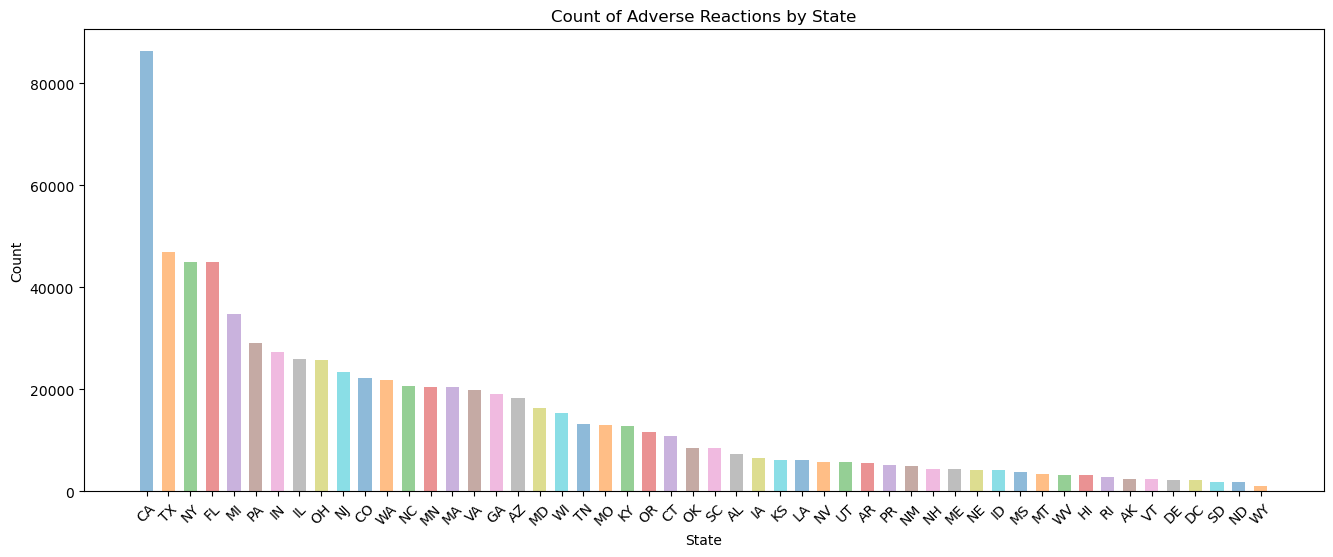

In [12]:
import seaborn as sns

y = state_counts_df["Count"]
x_labels = state_counts_df["State"]
x = np.arange(len(x_labels))

#Generate different colors
colors = sns.color_palette("tab10", len(x))

# Create te bar chart
plt.figure(figsize=(16,6))
plt.bar(x, y, color= colors, width=0.6, alpha=0.5, align='center', label="Adverse Reactions")


plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Adverse Reactions by State")

plt.show